In [121]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [122]:
# Read the data
df_1 = pd.read_csv('HBN.csv', index_col='Unnamed: 0')

# Check the data information
df_1.info()
df_1.describe()

# Check the table
df_1

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Enrol_Season                            3960 non-null   object 
 2   Age                                     3960 non-null   int64  
 3   Sex                                     3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-Score                              2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    float64
 

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


# ***Planning and Data Understanding and EDA***

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


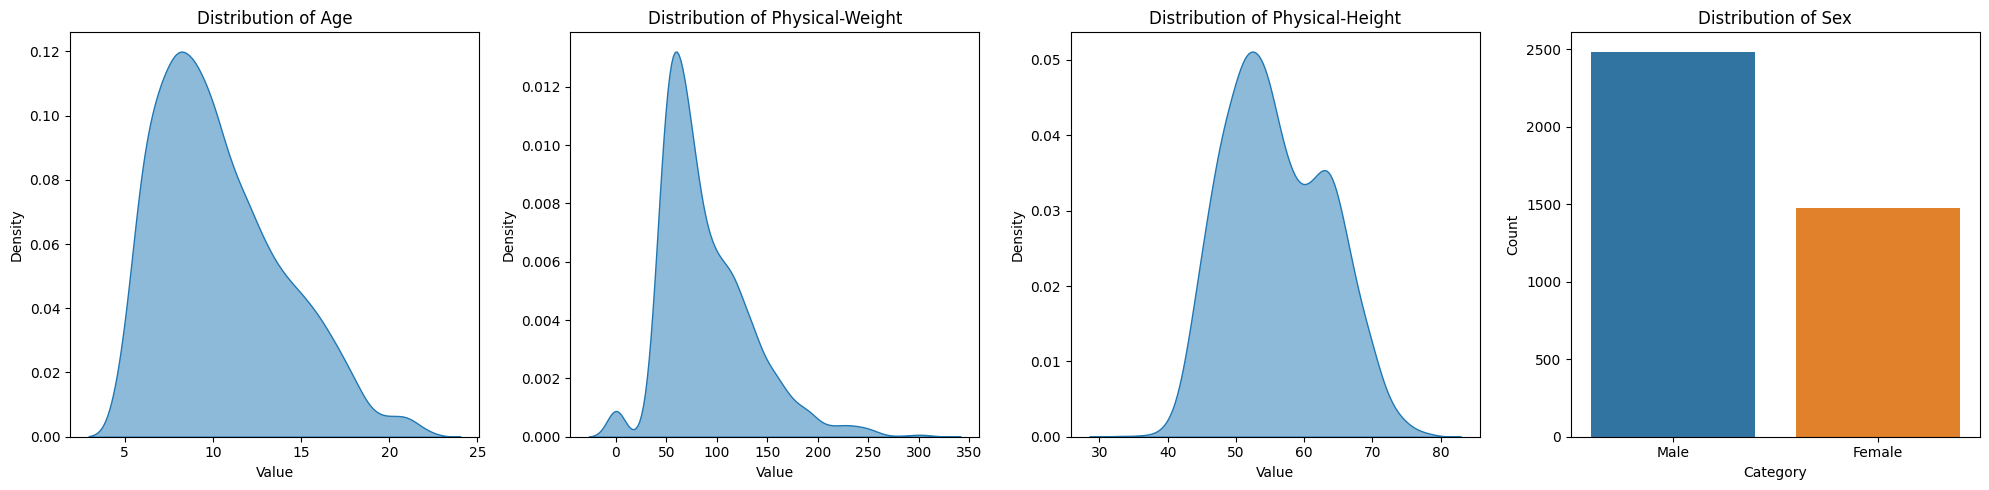

In [123]:
# Check the distribution of the some variables
columns_to_plot = ['Age', 'Physical-Weight', 'Physical-Height', 'Sex',] 
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  

for i, column in enumerate(columns_to_plot):  
    if column == 'Sex':  
        sns.countplot(x=column, data=df_1, ax=axes[i])
        axes[i].set_xticklabels(['Male', 'Female'])
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Category')  
        axes[i].set_ylabel('Count')  
    else:  
        sns.kdeplot(df_1[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  

plt.tight_layout()  
plt.show()  

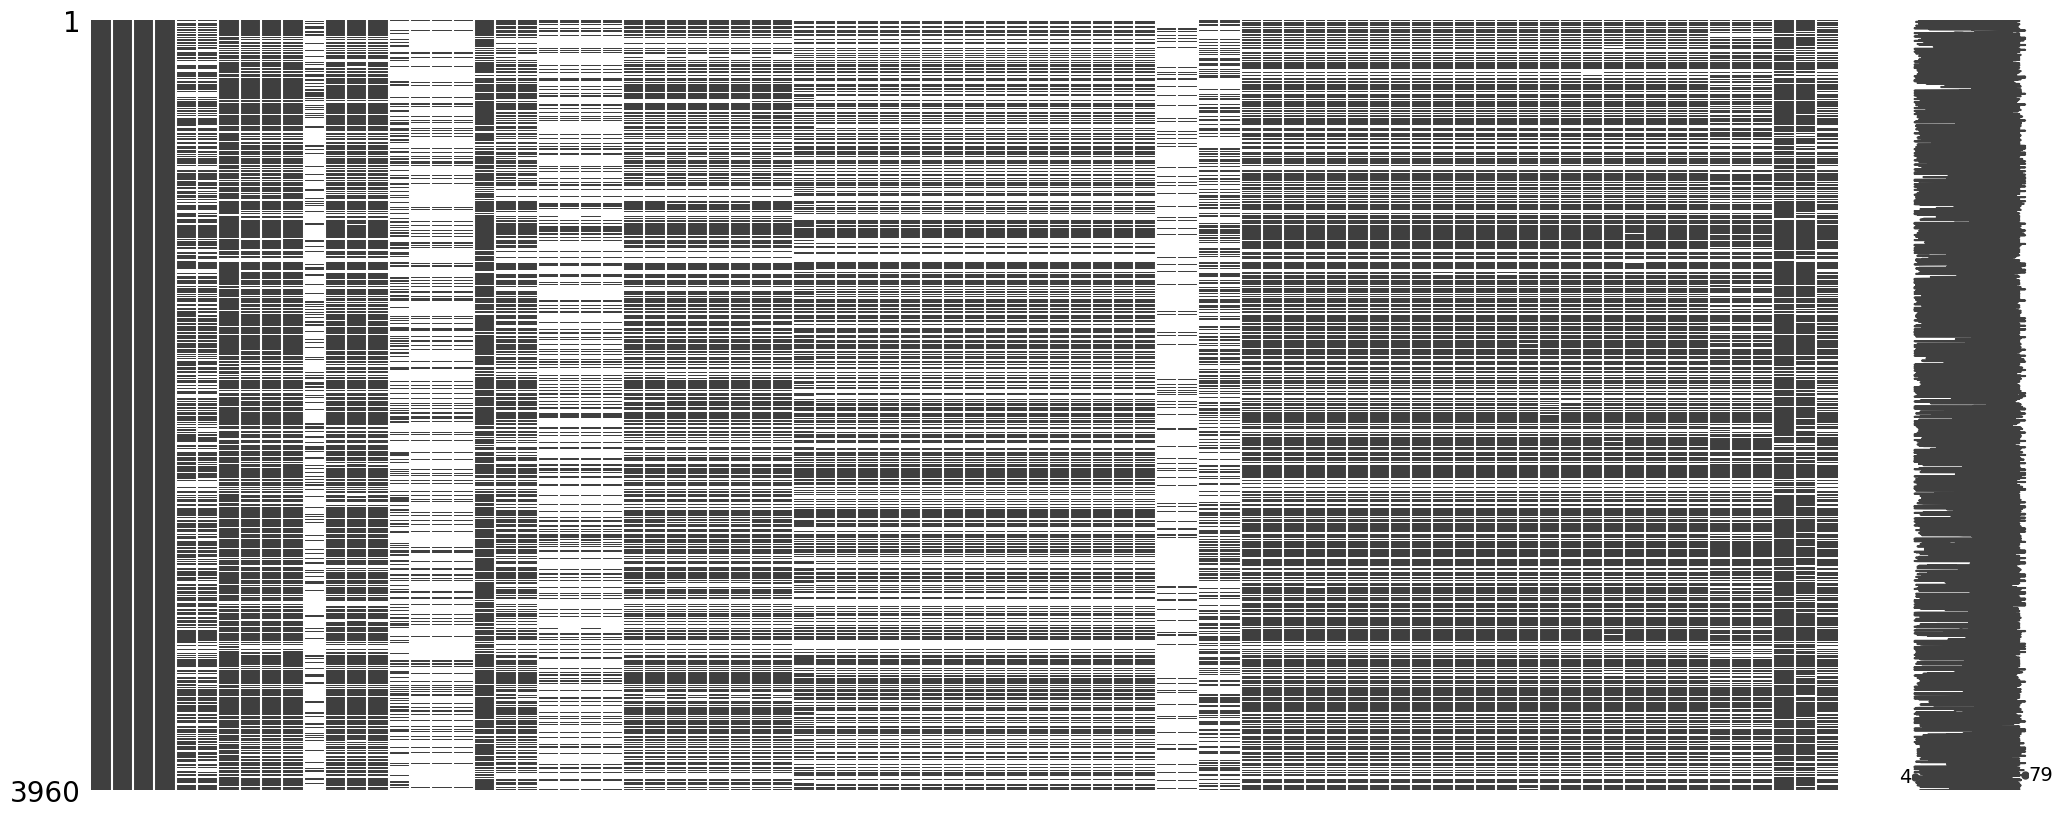

In [124]:
msno.matrix(df_1)
plt.show()

In [125]:
# Check the number and percentage of missing values
missing_values = df_1.isnull().sum()
missing_percentage = (df_1.isnull().sum() / len(df_1)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
id,0,0.000000
Enrol_Season,0,0.000000
Age,0,0.000000
Sex,0,0.000000
CGAS-Season,1405,35.479798
...,...,...
SDS-SDS_Total_Raw,1351,34.116162
SDS-SDS_Total_T,1354,34.191919
PreInt_EduHx-Season,420,10.606061
PreInt_EduHx-computerinternet_hoursday,659,16.641414


In [126]:
# df_1[['Physical-BMI', 'BIA-BIA_BMI']] # Values are the same but Physical-BMI has less Nan Values

In [127]:
# # Select only numeric columns
# numeric_df = df_1.select_dtypes(include=[np.number])

# # Plot the heatmap to check the correlation between the variables
# corr_df = numeric_df.corr().abs()
# plt.figure(figsize=(20, 20))
# sns.heatmap(corr_df, annot=False, cmap=['blue', 'cyan', 'green', 'yellow', 'red'], linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [128]:
# # Identify columns that have more than 70% correlation with the target variable
# sii_corr = numeric_df.corr()['sii'].abs()
# sii_corr = sii_corr[sii_corr > 0.7].sort_values(ascending=False)
# sii_corr

In [129]:
# # Identify columns that have more than 70% correlation with the target variable
# t_corr = numeric_df.corr()['SDS-SDS_Total_T'].abs()
# t_corr = t_corr[t_corr > 0.7].sort_values(ascending=False)
# t_corr

In [130]:
# # Distribution of the target variable
# sns.histplot(df_1['sii'], kde=True)
# plt.title('Distribution of Target Variable (sii)')
# plt.show()

In [131]:
# # Boxplot for outlier detection

# sns.boxplot(df_1['sii'])
# plt.title(f'Boxplot of "sii" column')
# plt.show()

# ***Data Collection***

In [132]:
# Convert 'sii' to categorical
df_1['sii'] = pd.Categorical(df_1['sii'], ordered=True)

# Split data based on ID first
train_ids, test_ids = train_test_split(df_1['id'], test_size=0.15, random_state=42)

In [133]:
# Read the acceleration data to access additional useful features of each participant
parquet_directory = '../../../QBC8_AI_project_data_Q1/series.parquet'
acceleration_features_train = []
acceleration_features_test = []

for folder in os.listdir(parquet_directory):
    folder_path = os.path.join(parquet_directory, folder)
    file_path = os.path.join(folder_path, "part-0.parquet")

    # Access to ID and collect
    participant_id = folder[3:]

    # Read particular columns (to reduce the time of the data analysis process)
    acceleration_data = pd.read_parquet(file_path, columns=['anglez', 'enmo', 'light', 'non-wear_flag', 'time_of_day', 'weekday'])

    # Collect the expected features from the acceleration data
    features = {
        'id': participant_id,
        'avg_activity': acceleration_data['enmo'].mean(),
        'std_activity': acceleration_data['enmo'].std(),
        'avg_angle': acceleration_data['anglez'].mean(),
        'std_angle': acceleration_data['anglez'].std(),
        'avg_light': acceleration_data['light'].mean(),
        'non_wear_time': (acceleration_data['non-wear_flag'] == 1).sum() / len(acceleration_data)
    }

    # Collect the activity by time of day and day of week
    acceleration_data['time_period'] = pd.cut(acceleration_data['time_of_day'],
                                              bins=[0, 6*3600000000000, 12*3600000000000, 18*3600000000000, 24*3600000000000],
                                              labels=['night', 'morning', 'afternoon', 'evening'])
    period_means = acceleration_data.groupby('time_period', observed=False)['enmo'].mean()
    for period in ['morning', 'afternoon', 'evening', 'night']:
        features[f'activity_{period}'] = period_means.get(period, 0)

    weekday_means = acceleration_data.groupby('weekday')['enmo'].mean()
    for day in range(1, 8):
        features[f'activity_day_{day}'] = weekday_means.get(day, 0)

    # Add all features to the acceleration features list
    if participant_id in train_ids.values:
        acceleration_features_train.append(features)
    else:
        acceleration_features_test.append(features)

# Create the second dataset based on acceleration data
df_2_train = pd.DataFrame(acceleration_features_train)
df_2_test = pd.DataFrame(acceleration_features_test)


In [134]:
# Combine two data sets based on ID column (only for training data)
df_train = pd.merge(df_1[df_1['id'].isin(train_ids)], df_2_train, on='id', how='inner')
df_test = pd.merge(df_1[df_1['id'].isin(test_ids)], df_2_test, on='id', how='inner')

# Check the data information
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   id                                      844 non-null    object  
 1   Enrol_Season                            844 non-null    object  
 2   Age                                     844 non-null    int64   
 3   Sex                                     844 non-null    int64   
 4   CGAS-Season                             808 non-null    object  
 5   CGAS-Score                              808 non-null    float64 
 6   Physical-Season                         840 non-null    object  
 7   Physical-BMI                            834 non-null    float64 
 8   Physical-Height                         837 non-null    float64 
 9   Physical-Weight                         835 non-null    float64 
 10  Physical-Waist_Circumference            42 non-nul

# ***Data Preprocessing***

In [135]:
# Remove columns with more than 50% missing values in both df_train and df_test
missing_values_train = df_train.isnull().mean() * 100
missing_values_test = df_test.isnull().mean() * 100
columns_to_drop = list(set(missing_values_train[missing_values_train > 50].index) | set(missing_values_test[missing_values_test > 50].index))
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

# Delete useless columns
columns_to_drop = ['id']
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

# Delete "PCIAT" columns as decided by Quera team
pciat_columns = [column for column in df_train.columns if column.startswith('PCIAT-')]
df_train = df_train.drop(columns=pciat_columns)
df_test = df_test.drop(columns=pciat_columns)

In [136]:
# Convert seasonal columns to numerical values
season_mapping = {
    'Spring': 1,
    'Summer': 2,
    'Fall': 3,
    'Winter': 4
}

season_columns = [col for col in df_train.columns if 'Season' in col]

for col in season_columns:
    df_train[col] = df_train[col].map(season_mapping)
    df_test[col] = df_test[col].map(season_mapping)

In [137]:
# Outliers management
# def remove_outliers(df, columns, iqr_threshold=1.5, z_score_threshold=3):
#     df_copy = df.copy()
#     for col in columns:
#         if df_copy[col].dtype in ['int64', 'float64']:
#             # IQR method
#             q1 = df_copy[col].quantile(0.25)
#             q3 = df_copy[col].quantile(0.75)
#             iqr = q3 - q1
#             lower_bound = q1 - iqr_threshold * iqr
#             upper_bound = q3 + iqr_threshold * iqr
#             iqr_mask = (df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)
#
#             # Z-score method
#             mean = df_copy[col].mean()
#             std = df_copy[col].std()
#             z_score_mask = np.abs((df_copy[col] - mean) / std) < z_score_threshold
#
#             # Combine both masks
#             mask = iqr_mask & z_score_mask
#             df_copy = df_copy[mask]
#     return df_copy
#
# numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
# df_train_cleaned = remove_outliers(df_train, numeric_columns)
# df_test

In [138]:
# Feature Engineering
def feature_engineering(df):
    df['Health_Index'] = df['Physical-BMI'] * (df['Physical-Systolic_BP'] + df['Physical-Diastolic_BP'])
    df['Weight_Height_Ratio'] = df['Physical-Weight'] / df['Physical-Height']
    df['Activity_Weekday_Avg'] = df[['activity_day_1', 'activity_day_2', 'activity_day_3', 'activity_day_4', 'activity_day_5']].mean(axis=1)
    df['Activity_Weekend_Avg'] = df[['activity_day_6', 'activity_day_7']].mean(axis=1)
    df['Activity_Diff'] = df['Activity_Weekday_Avg'] - df['Activity_Weekend_Avg']
    df['BMI_by_Age'] = df['Physical-BMI'] / (df['Age'] + 1)

    # df['HeartRate_by_Age'] = df['Physical-HeartRate'] / (df['Age'] + 1)
    # df['Activity_Variation'] = df['activity_afternoon'] / (df['activity_morning'] + 1e-6)
    # df['Sleep_Activity_Ratio'] = df['non_wear_time'] / (df['avg_activity'] + 1e-6)
    # if 'PreInt_EduHx-computerinternet_hoursday' in df.columns:
    #     df['Internet_Use_Avg'] = df['PreInt_EduHx-computerinternet_hoursday']
    #     df['Internet_Use_Activity_Ratio'] = df['Internet_Use_Avg'] / (df['avg_activity'] + 1e-6)
    #
    # # Difference from ideal weight based on BMI
    # df['Weight_Diff_From_Ideal'] = df['Physical-Weight'] - (df['Physical-Height']**2 * 22) / 703  # 22 is a common ideal BMI
    #
    # # Activity relative to age
    # df['Activity_by_Age'] = df['avg_activity'] / (df['Age'] + 1)
    #
    # # Activity to light ratio (indication of indoor vs outdoor activity)
    # df['Activity_Light_Ratio'] = df['avg_activity'] / (df['avg_light'] + 1e-6)
    #
    # # Activity throughout the day as a percentage of total activity
    # total_daily_activity = df['activity_morning'] + df['activity_afternoon'] + df['activity_evening'] + df['activity_night']
    # df['Morning_Activity_Percent'] = df['activity_morning'] / (total_daily_activity + 1e-6)
    # df['Afternoon_Activity_Percent'] = df['activity_afternoon'] / (total_daily_activity + 1e-6)
    # df['Evening_Activity_Percent'] = df['activity_evening'] / (total_daily_activity + 1e-6)
    # df['Night_Activity_Percent'] = df['activity_night'] / (total_daily_activity + 1e-6)
    #
    # # Physical activity relative to health status
    # df['Physical_Activity_Health_Index'] = df['avg_activity'] * df['Health_Index']
    #
    # # Weekly activity fluctuation
    # df['Weekly_Activity_Fluctuation'] = df[['activity_day_1', 'activity_day_2', 'activity_day_3', 'activity_day_4', 'activity_day_5', 'activity_day_6', 'activity_day_7']].std(axis=1)
    #
    # # Combine sleep and activity features
    # df['Sleep_Efficiency'] = (df['SDS-SDS_Total_T'] - df['non_wear_time']) / (df['SDS-SDS_Total_T'] + 1e-6)
    #
    # # Activity to internet use ratio
    # if 'PreInt_EduHx-computerinternet_hoursday' in df.columns:
    #     df['Physical_Activity_Internet_Ratio'] = df['avg_activity'] / (df['PreInt_EduHx-computerinternet_hoursday'] + 1e-6)

    return df

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [139]:
# Split the data into train, validation, and test sets
X_train = df_train.drop('sii', axis=1)
y_train = df_train['sii']

X_test = df_test.drop('sii', axis=1)
y_test = df_test['sii']

# Then split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)

# Separate the categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Define the methods of filling in missing values (KNN, mean, median)
knn_features = [
    'CGAS-Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
    'Physical-HeartRate', 'Physical-Systolic_BP'
]

median_features = ['FGC-FGC_CU', 'FGC-FGC_CU_Zone']
mean_features = [col for col in numeric_columns if col not in knn_features + median_features and not col.endswith('Season')]

# Assign the pipeline method for numerical and categorical columns
numeric_pipeline = Pipeline(steps=[
    ('imputer', ColumnTransformer(
        transformers=[
            ('knn', KNNImputer(n_neighbors=5), knn_features),
            ('mean', SimpleImputer(strategy='mean'), mean_features),
            ('median', SimpleImputer(strategy='median'), median_features)
        ]
    )),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine both processes
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_pipeline, numeric_columns),
        ('categorical', categorical_pipeline, categorical_columns)
    ])

# Use RFE for feature selection
rfe_selector = RFE(estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=42), n_features_to_select=40, step=1)

# Assign the main pipeline process
main_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', rfe_selector),
    ('pca', PCA(n_components=0.80))
])

# Fit and transform the training data
X_train_preprocessed = main_pipeline.fit_transform(X_train, y_train)

# Transform the validation and test data using the same pipeline
X_val_preprocessed = main_pipeline.transform(X_val)
X_test_preprocessed = main_pipeline.transform(X_test)

# Apply binning to the target variable (only on training data)
bins = [-0.5, 0.5, 1.5, 2.5, 3.5]
labels = [0, 1, 2, 3]
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True, duplicates='drop')
y_val_binned = pd.cut(y_val, bins=bins, labels=labels, include_lowest=True, duplicates='drop')
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True, duplicates='drop')

In [140]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)

# SMOTE with Tomek Links
smote_tomek = SMOTETomek(random_state=42, smote=smote)
X_train_resampled_tomek, y_train_resampled_tomek = smote_tomek.fit_resample(X_train_preprocessed, y_train_binned)

# ***Model Training Process***

In [141]:
# Use RandomForestClassifier as the basic algorithm
model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

# Tuning process of hyperparameters
param_grid = {
    'n_estimators': [250],
    'max_depth': [9],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_leaf_nodes': [None],
}

# Create the cross-validation object
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_resampled_tomek, y_train_resampled_tomek)

# Best parameters and the best estimator
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score after tune: {:.2f}".format(grid_search.best_score_))

# Use the best model for predictions
best_model = grid_search.best_estimator_

Fitting 16 folds for each of 1 candidates, totalling 16 fits
Best parameters: {'max_depth': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-validation score after tune: 0.81


Validation Accuracy: 0.5905511811023622
Validation Precision: 0.608052451941531
Validation Recall: 0.5905511811023622
Validation F1 score: 0.5976315375774771
Validation AUC: 0.75427202223852


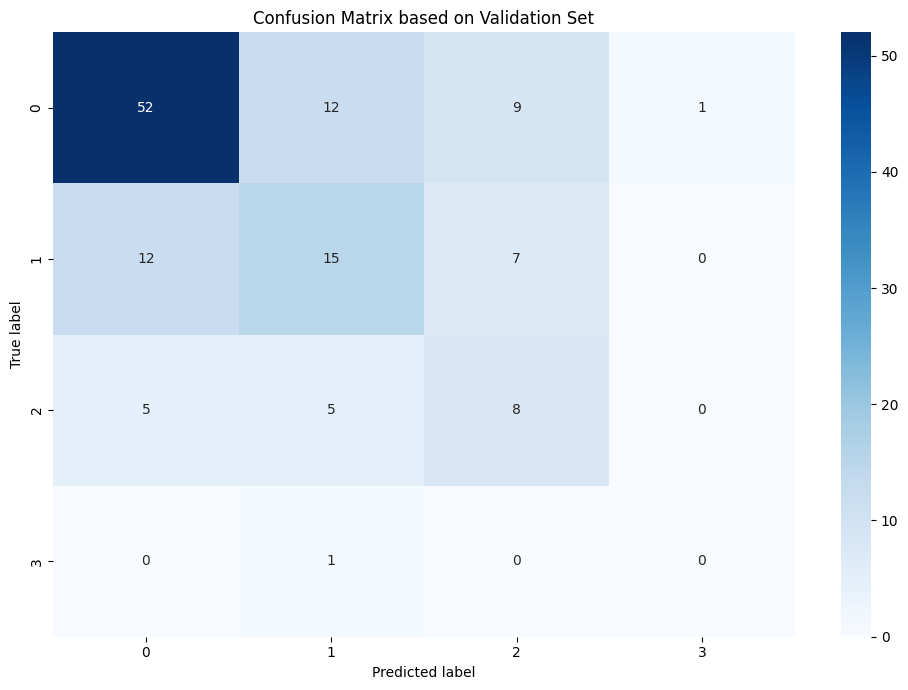

In [142]:
# Evaluate the model on validation data
y_val_pred = best_model.predict(X_val_preprocessed)

# Calculate evaluation metrics on validation data
accuracy_val = accuracy_score(y_val_binned, y_val_pred)
precision_val = precision_score(y_val_binned, y_val_pred, average='weighted', zero_division=0)
recall_val = recall_score(y_val_binned, y_val_pred, average='weighted', zero_division=0)
f1_val = f1_score(y_val_binned, y_val_pred, average='weighted', zero_division=0)
auc_val = roc_auc_score(pd.get_dummies(y_val_binned), best_model.predict_proba(X_val_preprocessed), multi_class='ovo')

# Display the evaluation metrics based on validation data
print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1 score:", f1_val)
print("Validation AUC:", auc_val)

# Confusion Matrix based on validation data
cm_val = confusion_matrix(y_val_binned, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix based on Validation Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Test Accuracy: 0.5657894736842105
Test Precision: 0.6171584645718925
Test Recall: 0.5657894736842105
Test F1 score: 0.5821583862673926
Test AUC: 0.6972755508485079


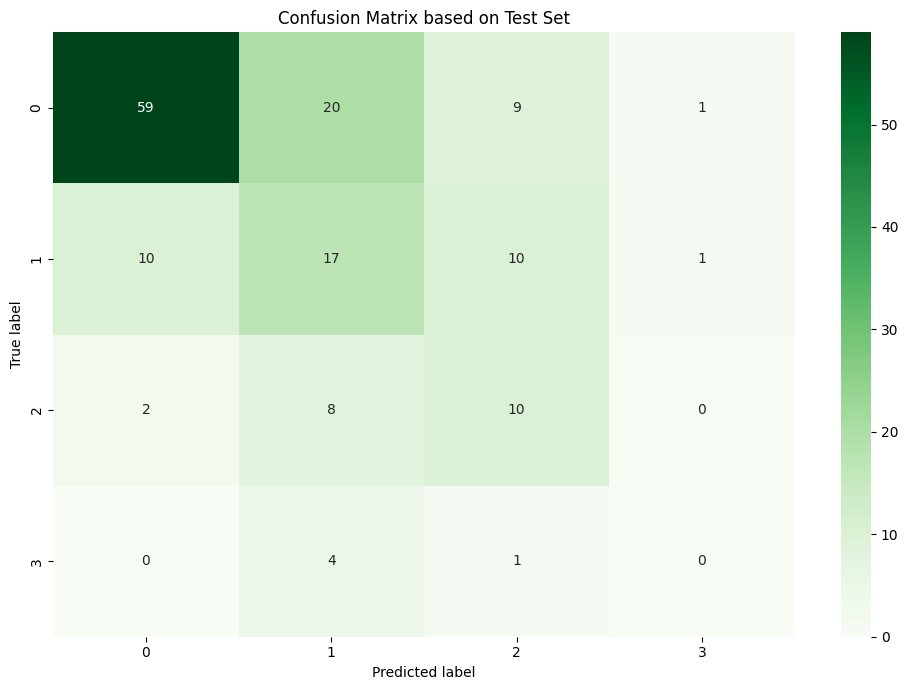

In [143]:
# Evaluate the model on test data
y_test_pred = best_model.predict(X_test_preprocessed)

# Calculate evaluation metrics on test data
accuracy_test = accuracy_score(y_test_binned, y_test_pred)
precision_test = precision_score(y_test_binned, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test_binned, y_test_pred, average='weighted', zero_division=0)
f1_test = f1_score(y_test_binned, y_test_pred, average='weighted', zero_division=0)
auc_test = roc_auc_score(pd.get_dummies(y_test_binned), best_model.predict_proba(X_test_preprocessed), multi_class='ovo')

# Display the evaluation metrics based on test data
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 score:", f1_test)
print("Test AUC:", auc_test)

# Confusion Matrix based on test data
cm_test = confusion_matrix(y_test_binned, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix based on Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ***Model Monitoring***

Train score mean: [0.97169811 0.93224299 0.93944099 0.95093458 0.9375     0.9371118
 0.93       0.92482517 0.92650104 0.91806331]
Train score std: [0.04902031 0.01214054 0.0134476  0.01342188 0.00849854 0.01230045
 0.0057735  0.00382135 0.00451232 0.00863465]
Validation score mean: [0.51183271 0.54390906 0.5606766  0.55787554 0.5536856  0.57457325
 0.56485102 0.56625543 0.55785227 0.55503569]
Validation score std: [0.0343846  0.01092902 0.00543584 0.02388455 0.02722887 0.02751196
 0.01725091 0.01178402 0.01667299 0.03012986]


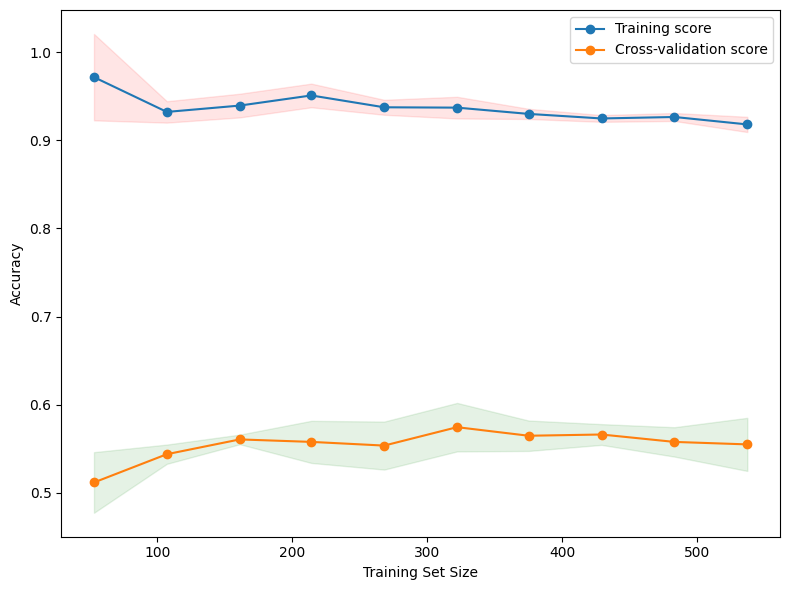

In [144]:
# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_preprocessed, y_train_binned, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

print(f'Train score mean: {train_scores_mean}')
print(f'Train score std: {train_scores_std}')
print(f'Validation score mean: {val_scores_mean}')
print(f'Validation score std: {val_scores_std}')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

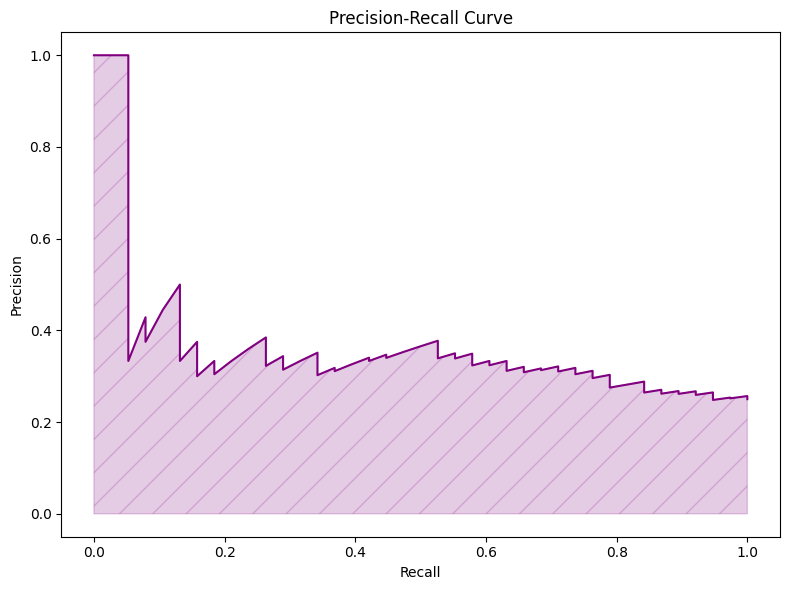

In [145]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binned == 1, best_model.predict_proba(X_test_preprocessed)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.fill_between(recall, precision, 0, color='purple', alpha=0.2, hatch='/')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.tight_layout()
plt.show()